In [4]:
import keras
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

In [5]:
# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

In [6]:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

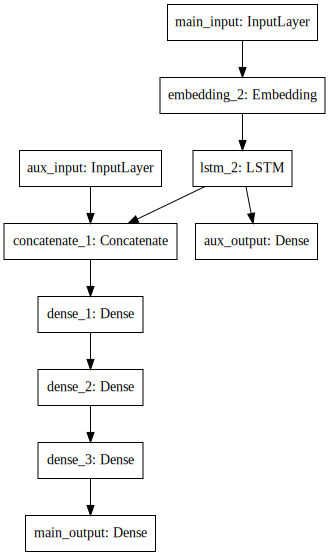

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
#I do not have the dat
model.compile(optimizer='rmsprop', loss='binary_crossentropy',loss_weights=[1., 0.2])
model.fit([headline_data, additional_data], [labels, labels],epochs=50, batch_size=32)
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})

# And trained it via:
model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': labels, 'aux_output': labels},
          epochs=50, batch_size=32)

In [ ]:
#let me find where this headline_data comes from and train the model
#cannot find the data...

In [8]:
model

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 32)           69760       embedding_2[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

Shared Layer

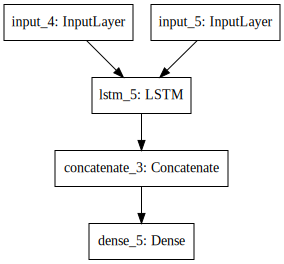

In [12]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

tweet_a = Input(shape=(280, 256))
tweet_b = Input(shape=(280, 256))
shared_lstm = LSTM(64)

# When we reuse the same layer instance
# multiple times, the weights of the layer
# are also being reused
# (it is effectively *the same* layer)
encoded_a = shared_lstm(tweet_a)
encoded_b = shared_lstm(tweet_b)

# We can then concatenate the two vectors:
merged_vector = keras.layers.concatenate([encoded_a, encoded_b], axis=-1)

# And add a logistic regression on top
predictions = Dense(1, activation='sigmoid')(merged_vector)

# We define a trainable model linking the
# tweet inputs to the predictions
model = Model(inputs=[tweet_a, tweet_b], outputs=predictions)

#I do not have the data
#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])
#model.fit([data_a, data_b], labels, epochs=10)
SVG(model_to_dot(model).create(prog='dot', format='svg'))